# **Importing important libraries**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# **Loading the Dataset**

In [ ]:
df=pd.read_csv("insurance.csv")
df1=df.copy()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

### Dataset contains total 1338 rows and 7 columns including the response variable.

# **Checking Null and Duplicated values in the df**

In [ ]:
df.duplicated().value_counts()

,count
False,1337
True,1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### No null value found in any one of the column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# **Checking for inconsistency in object type columns**

In [ ]:
df["sex"].value_counts(),df["smoker"].value_counts(),df["region"].value_counts()

(sex
 male      675
 female    662
 Name: count, dtype: int64,
 smoker
 no     1063
 yes     274
 Name: count, dtype: int64,
 region
 southeast    364
 southwest    325
 northwest    324
 northeast    324
 Name: count, dtype: int64)

No inconsistency in any of the object type columns

In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#**Summary Stats**

1.   AGE

*   Age is b/w 18 to 64
*   Mean age is 39


2.   Children


*   Approximately 1 child of each member


3.   Premium


*   mean insurance premium amount is 13270.42


4. Average BMI is approx. 30













# **Univariate Exploratory Data Analysis**

# **Age**

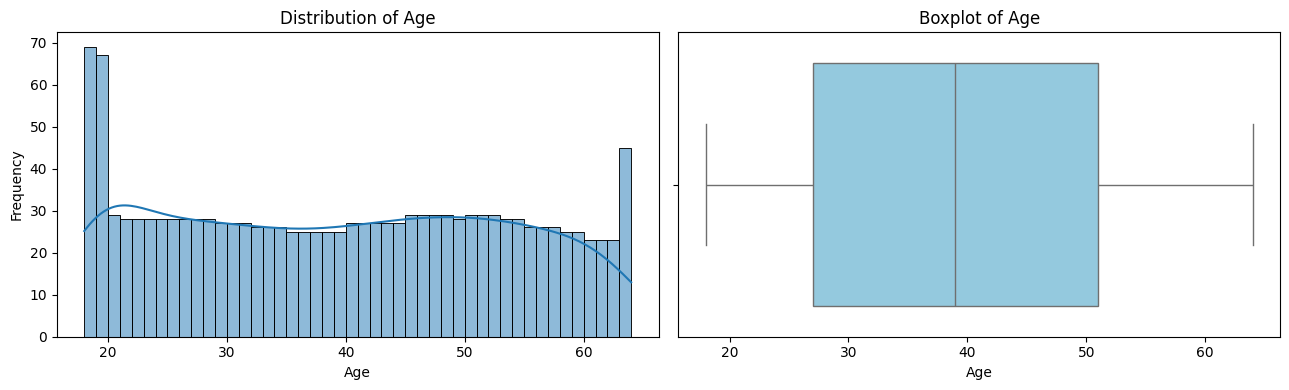

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
sns.histplot(df["age"], bins=46, edgecolor='black', kde=True, stat="frequency", ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Age')

sns.boxplot(x=df["age"], ax=ax2,color="skyblue")
ax2.set_xlabel('Age')
ax2.set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

### **The distribution of age is approximately uniform b/w age 20 to 63. Also no outliers in Age column.**

# **BMI**

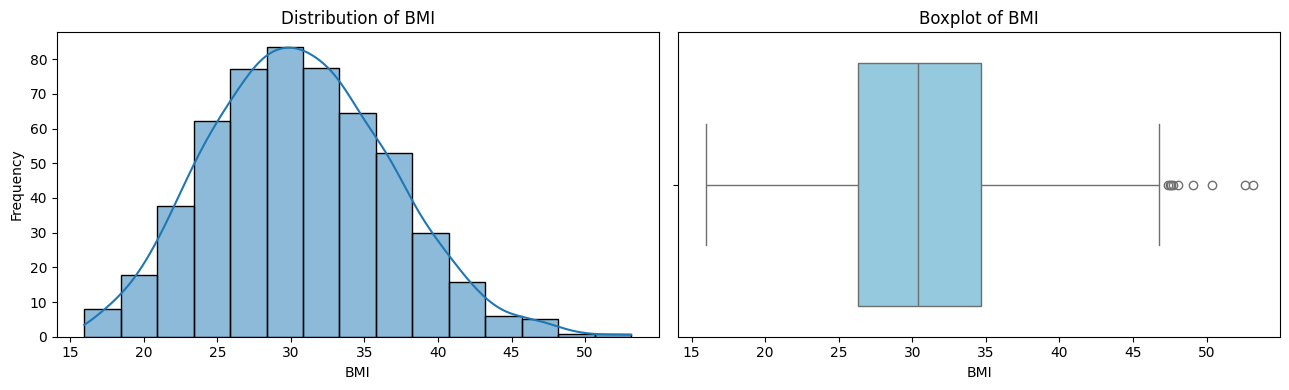

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
sns.histplot(df["bmi"], bins=15, edgecolor='black', kde=True, stat="frequency", ax=ax1)
ax1.set_xlabel('BMI')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of BMI')

sns.boxplot(x=df["bmi"], ax=ax2,color="skyblue")
ax2.set_xlabel('BMI')
ax2.set_title('Boxplot of BMI')

plt.tight_layout()
plt.show()

In [ ]:
stats.shapiro(df["bmi"])

ShapiroResult(statistic=np.float64(0.9938755131647968), pvalue=np.float64(2.575292856043621e-05))

### **The histogram plot of BMI shows that it is approx. Normal but not exactly as the shapiro test rejects it's normality. Also there are some Outlies in BMI column.**

# **Charges (Insurance Premium)**

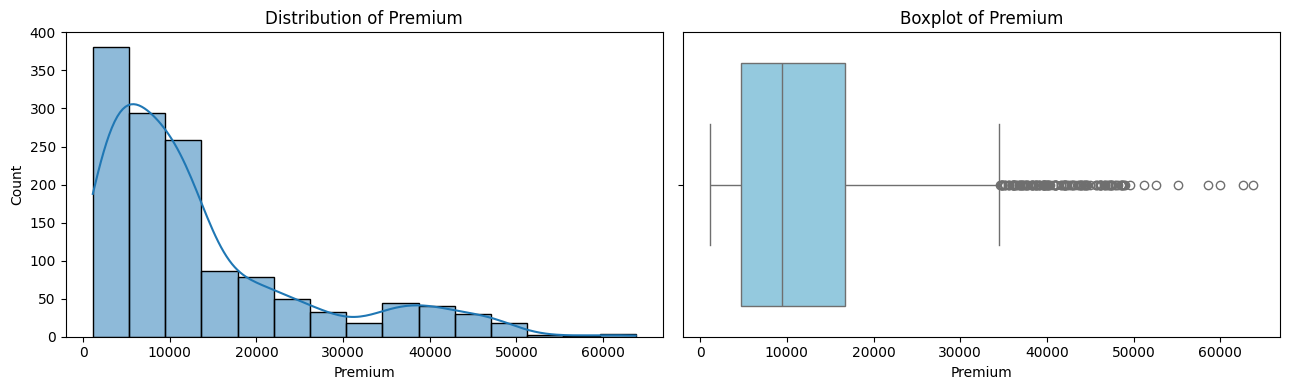

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
sns.histplot(df["charges"], bins=15, edgecolor='black', kde=True, stat="count", ax=ax1)
ax1.set_xlabel('Premium')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Premium')

sns.boxplot(x=df["charges"], ax=ax2,color="skyblue")
ax2.set_xlabel('Premium')
ax2.set_title('Boxplot of Premium')

plt.tight_layout()
plt.show()

### **Distribution of the response variable Charges is positively skewed and also there are many outliers.**

In [ ]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=np.float64(0.8147607893099357), pvalue=np.float64(1.1959741756687743e-36))

In [ ]:
y=df["charges"]
y2,lam=stats.boxcox(y)
lam

np.float64(0.043516942579678274)

In [ ]:
stats.shapiro(y2)

ShapiroResult(statistic=np.float64(0.9836022370485226), pvalue=np.float64(3.6094668080109406e-11))

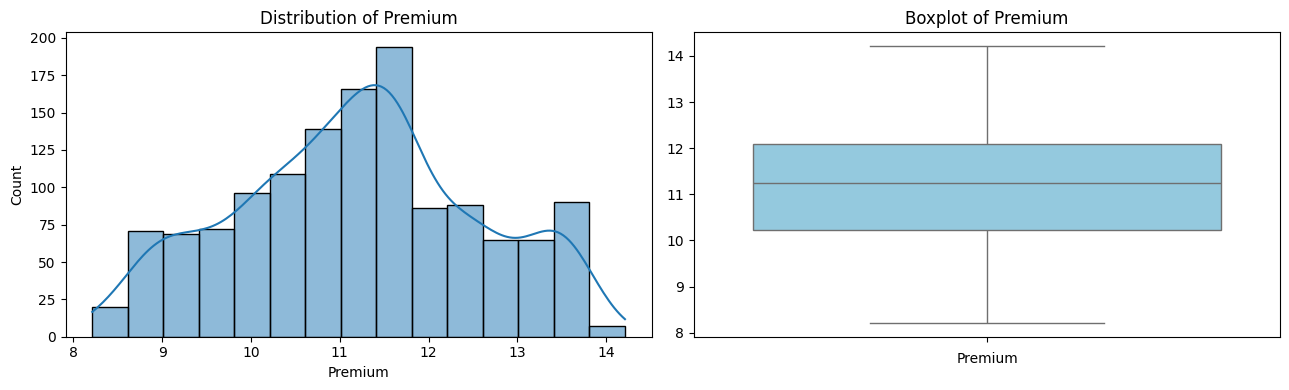

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
sns.histplot(y2, bins=15, edgecolor='black', kde=True, stat="count", ax=ax1)
ax1.set_xlabel('Premium')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Premium')

sns.boxplot(y2, ax=ax2,color="skyblue")
ax2.set_xlabel('Premium')
ax2.set_title('Boxplot of Premium')

plt.tight_layout()
plt.show()

In [ ]:
skew=stats.skew(y2)
skew

np.float64(-0.008664562166442466)

### **Shapiro Wilk test rejects the normality of the response variable. After using BoxCox Transformation we got transformed Charges with approximately 0 skewness.**

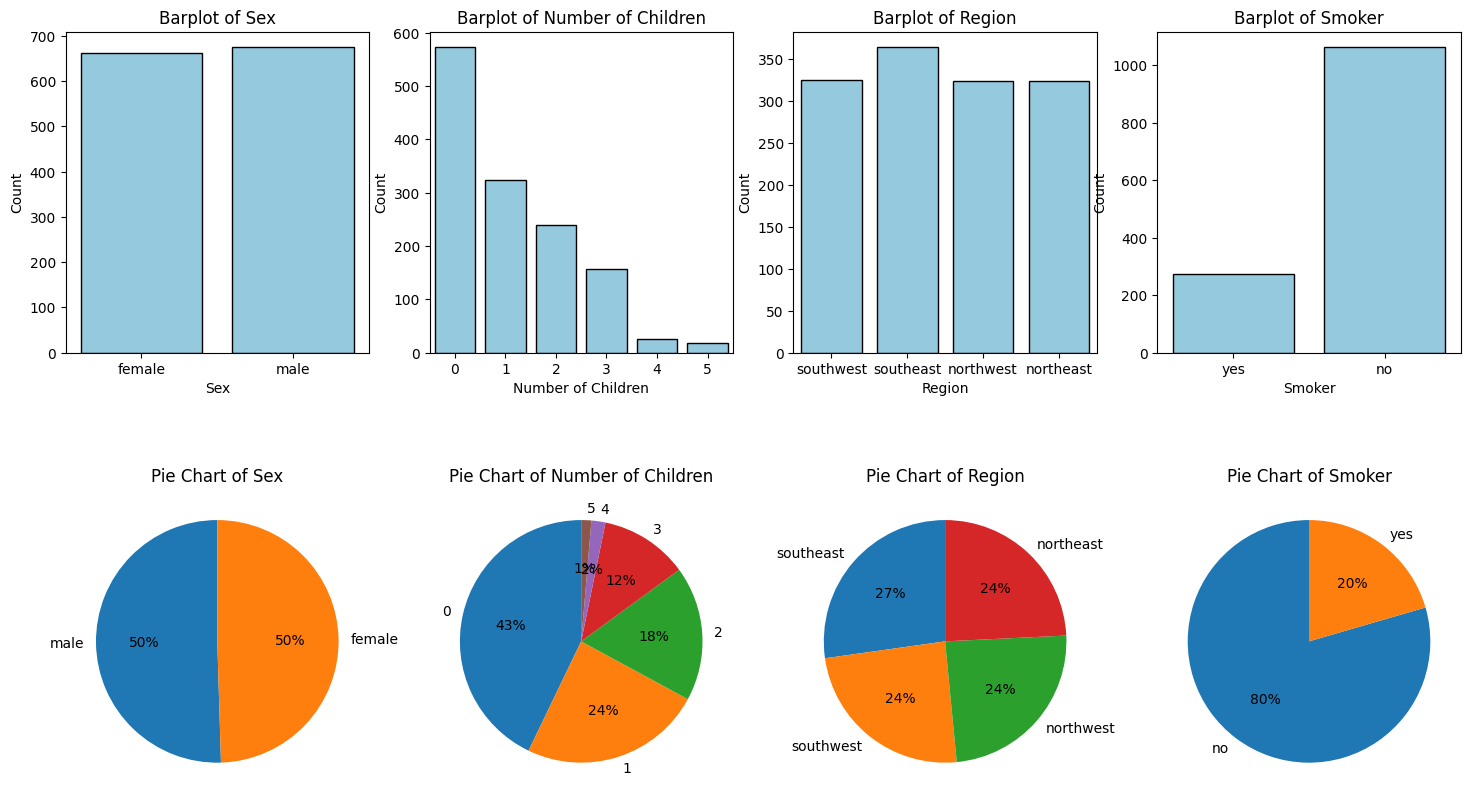

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)

# ====================
# 1st Row - Barplots
# ====================
# Barplot - Sex
sns.countplot(x='sex', data=df, ax=axes[0, 0],edgecolor="black",color="skyblue")
axes[0, 0].set_title('Barplot of Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Count')

# Barplot - Children
sns.countplot(x='children', data=df, ax=axes[0, 1],edgecolor="black",color="skyblue")
axes[0, 1].set_title('Barplot of Number of Children')
axes[0, 1].set_xlabel('Number of Children')
axes[0, 1].set_ylabel('Count')

# Barplot - Region
sns.countplot(x='region', data=df, ax=axes[0, 2],edgecolor="black",color="skyblue")
axes[0, 2].set_title('Barplot of Region')
axes[0, 2].set_xlabel('Region')
axes[0, 2].set_ylabel('Count')

# Barplot - Smoker
sns.countplot(x='smoker', data=df, ax=axes[0, 3],edgecolor="black",color="skyblue")
axes[0, 3].set_title('Barplot of Smoker')
axes[0, 3].set_xlabel('Smoker')
axes[0, 3].set_ylabel('Count')
# ====================
# 2nd Row - Pie Charts
# ====================
# Pie - Sex
df['sex'].value_counts().plot.pie(autopct='%1.0f%%', ax=axes[1, 0], startangle=90,color="rainbow")
axes[1, 0].set_ylabel('')
axes[1, 0].set_title('Pie Chart of Sex')

# Pie - Children
df['children'].value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[1, 1], startangle=90,color="rainbow")
axes[1, 1].set_ylabel('')
axes[1, 1].set_title('Pie Chart of Number of Children')

# Pie - Region
df['region'].value_counts().plot.pie(autopct='%1.0f%%', ax=axes[1, 2], startangle=90,color="rainbow")
axes[1, 2].set_ylabel('')
axes[1, 2].set_title('Pie Chart of Region')

# Pie - Smoker
df['smoker'].value_counts().plot.pie(autopct='%1.0f%%', ax=axes[1, 3], startangle=90,color="rainbow")
axes[1, 3].set_ylabel('')
axes[1, 3].set_title('Pie Chart of Smoker')
plt.show()

###    Approx. 51% of members are Male so distribution of sex is uniform.
###    Members having no children are approx. 43% and distribution is positively skewed.
###    Proportion of policyholders by region is approx. uniform.
###    Approx 20% of policyholders are smoker.

# **Bivariate Exploratory Data Analysis**

## **Age vs Charges**

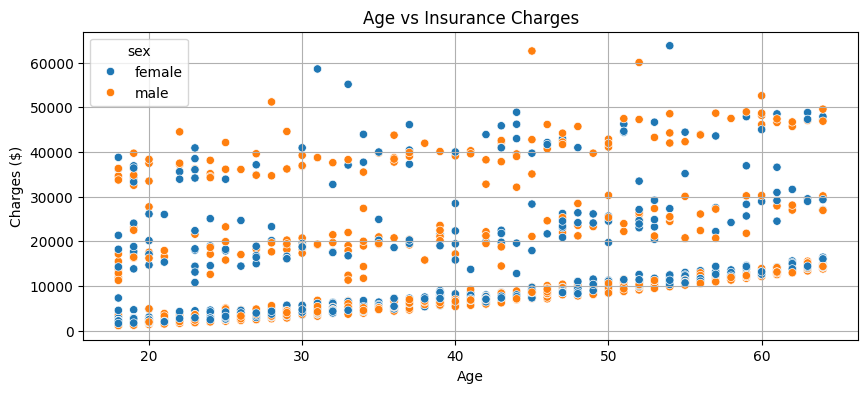

In [ ]:
fig,ax=plt.subplots(figsize=(10,4))
#sns.regplot(x=df["age"],y=df["charges"],line_kws={"color":"red"},color="skyblue")
sns.scatterplot(x=df["age"],y=df["charges"],color="skyblue",hue=df["sex"])
ax.set_xlabel('Age')
ax.set_ylabel('Charges')
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.grid(True)
plt.show()

### There is a weak positive linear relationship bw age and response

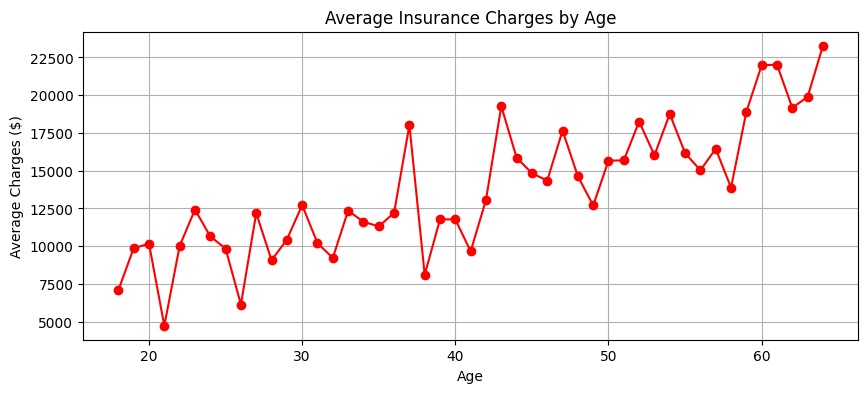

In [ ]:
# Average charges by age
age_charges = df.groupby('age')['charges'].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(age_charges['age'], age_charges['charges'], marker='o', linestyle='-',color="red",)
plt.title('Average Insurance Charges by Age')
plt.xlabel('Age')
plt.ylabel('Average Charges ($)')
plt.grid(True)
plt.show()

## **BMI vs Charges**

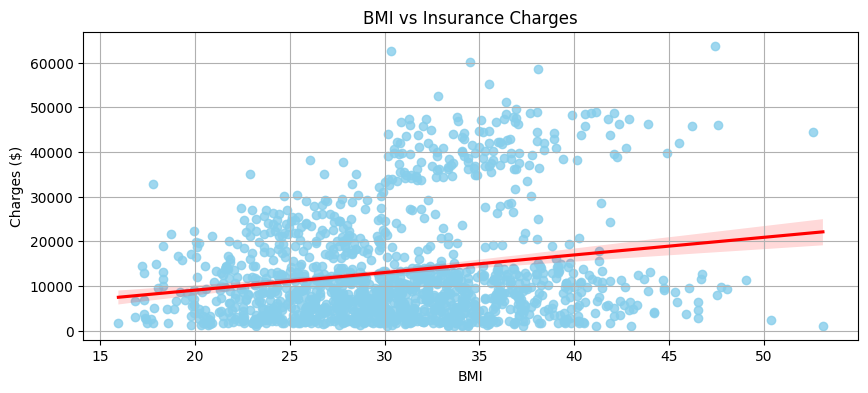

In [ ]:
fig,ax=plt.subplots(figsize=(10,4))
sns.regplot(x=df["bmi"],y=df["charges"],line_kws={"color":"red"},color="skyblue")
#sns.scatterplot(x=df["bmi"],y=df["charges"],color="skyblue",hue=df["sex"])
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.grid(True)
plt.show()

### There is a weak positive linear relationship bw BMI and response

In [ ]:
# Create BMI categories based on standard ranges
bmi_bins = [0, 18.5, 25, 30, 35, 40, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

# Calculate average charges by BMI category
avg_charges = df.groupby('bmi_category')['charges'].mean().reset_index()

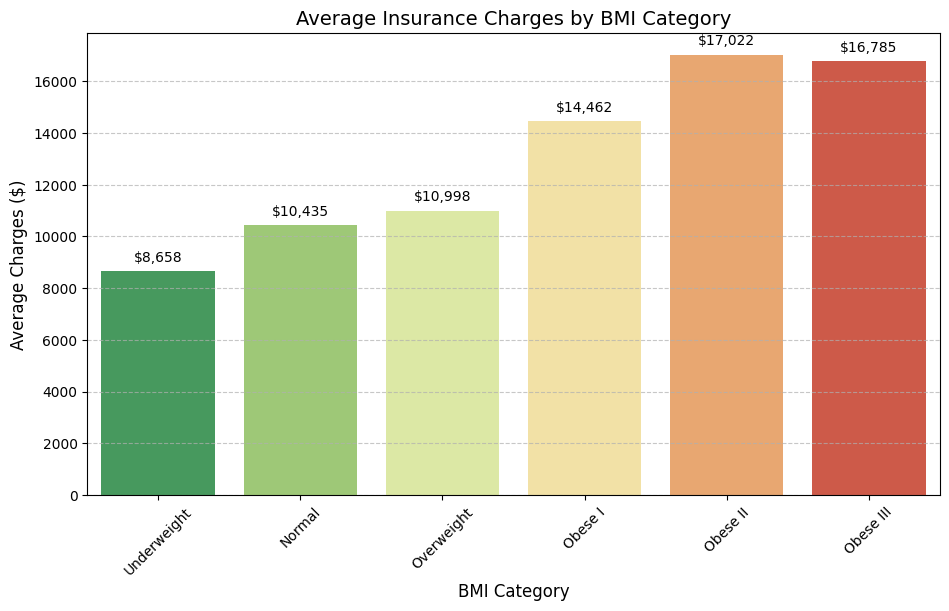

In [ ]:
# Create the plot
plt.figure(figsize=(11, 6))
ax = sns.barplot(x='bmi_category', y='charges', data=avg_charges,
                 order=bmi_labels, palette='RdYlGn_r')

# Customize the plot
plt.title('Average Insurance Charges by BMI Category', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Average Charges ($)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height ()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()


## **Number of children vs Charges**

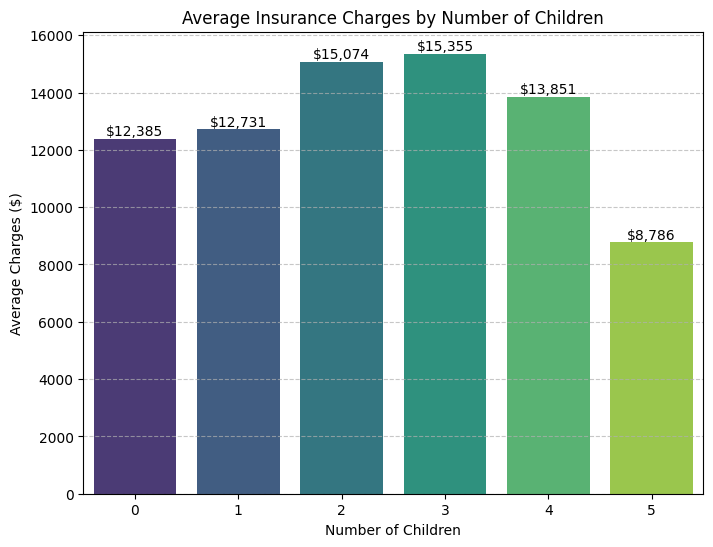

In [ ]:

# Calculate average charges by number of children
avg_charges = df.groupby('children')['charges'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='children', y='charges', data=avg_charges, palette='viridis')

# Add titles and labels
plt.title('Average Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges ($)')

# Add value labels on top of bars
for index, row in avg_charges.iterrows():
    plt.text(row.name, row.charges, f'${row.charges:,.0f}',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Smoker vs Charges**

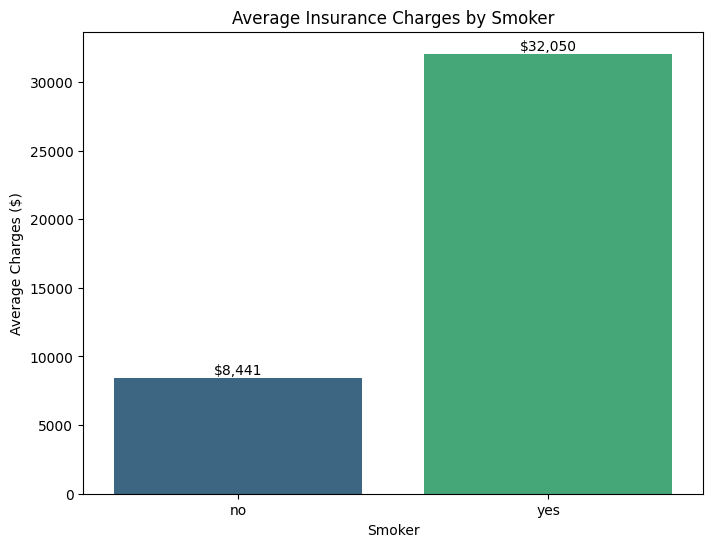

In [ ]:

# Calculate average charges by number of children
avg_charges = df.groupby('smoker')['charges'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=avg_charges, palette='viridis')

# Add titles and labels
plt.title('Average Insurance Charges by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Average Charges ($)')

# Add value labels on top of bars
for index, row in avg_charges.iterrows():
    plt.text(row.name, row.charges, f'${row.charges:,.0f}',
             ha='center', va='bottom')
plt.show()

## **Region vs Charges**

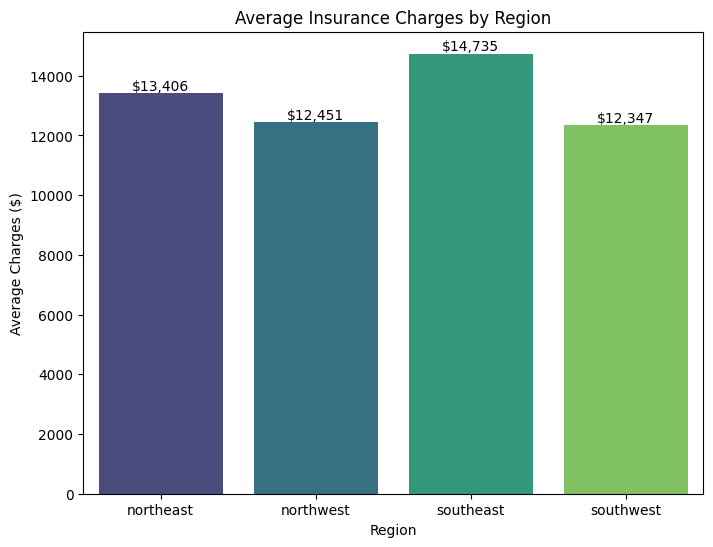

In [ ]:
# Calculate average charges by number of children
avg_charges = df.groupby('region')['charges'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', data=avg_charges, palette='viridis')

# Add titles and labels
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges ($)')

# Add value labels on top of bars
for index, row in avg_charges.iterrows():
    plt.text(row.name, row.charges, f'${row.charges:,.0f}',
             ha='center', va='bottom')
plt.show()

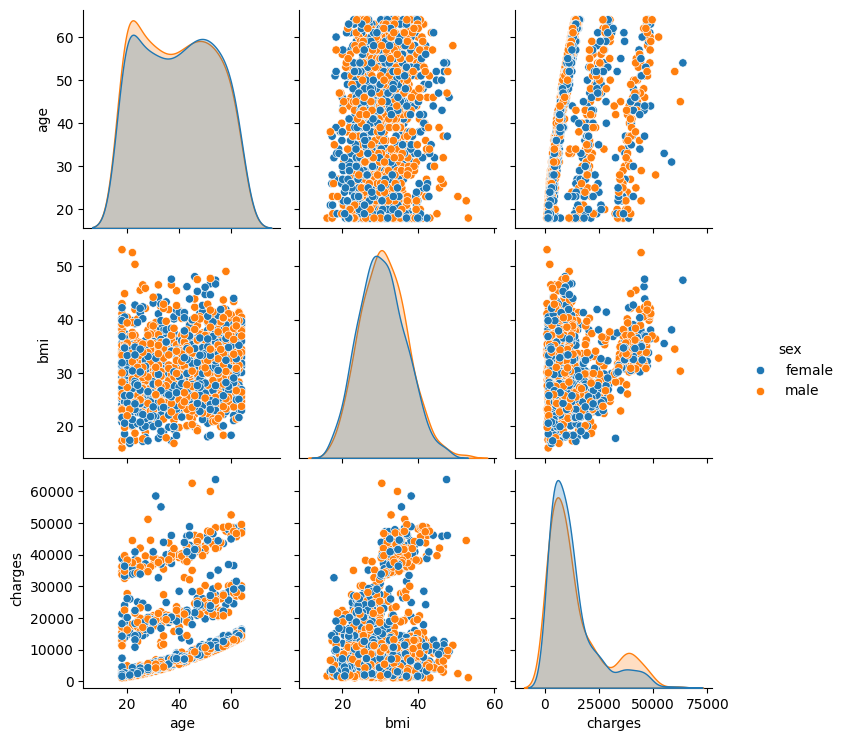

In [ ]:
sns.pairplot(df,vars=["age","bmi","charges"],hue="sex")

In [ ]:
df.drop(['bmi_category'],inplace =True,axis=1)

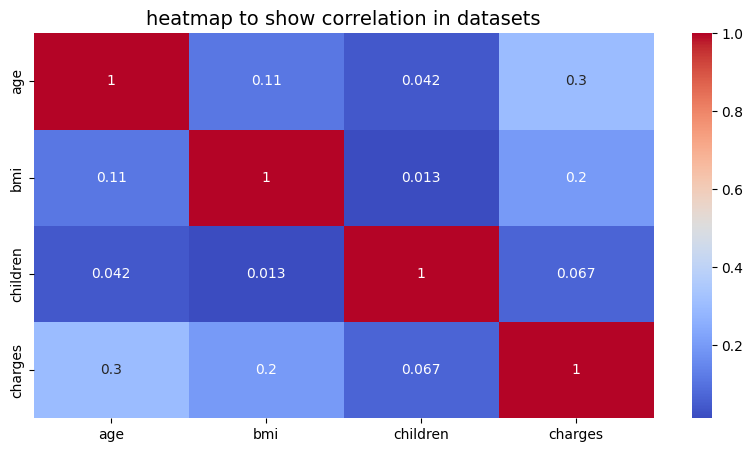

In [ ]:
plt.figure(figsize=(10, 5))  # Adjust the figure size based on the number of plots
sns.heatmap( df.drop(["sex","smoker",'region'],axis=1).corr(), annot = True, cmap = 'coolwarm')
plt.title("heatmap to show correlation in datasets",fontsize=14)
plt.show()

In [ ]:
def categorize_children(x):
    if x == 0:
        return 'No Children'
    elif x in [1, 2]:
        return 'Few Children'
    else:
        return 'Many Children'

df['children_category'] = df['children'].apply(categorize_children)


In [ ]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(df, columns=['sex', 'smoker', 'region','children_category' ])

X = data.drop(['charges','children','sex_female','smoker_no','region_northeast','children_category_No Children'], axis=1)
y = data['charges']
X

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_category_Few Children,children_category_Many Children
0,19,27.900,False,True,False,False,True,False,False
1,18,33.770,True,False,False,True,False,True,False
2,28,33.000,True,False,False,True,False,False,True
3,33,22.705,True,False,True,False,False,False,False
4,32,28.880,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,True,False,True,False,False,False,True
1334,18,31.920,False,False,False,False,False,False,False
1335,18,36.850,False,False,False,True,False,False,False
1336,21,25.800,False,False,False,False,True,False,False


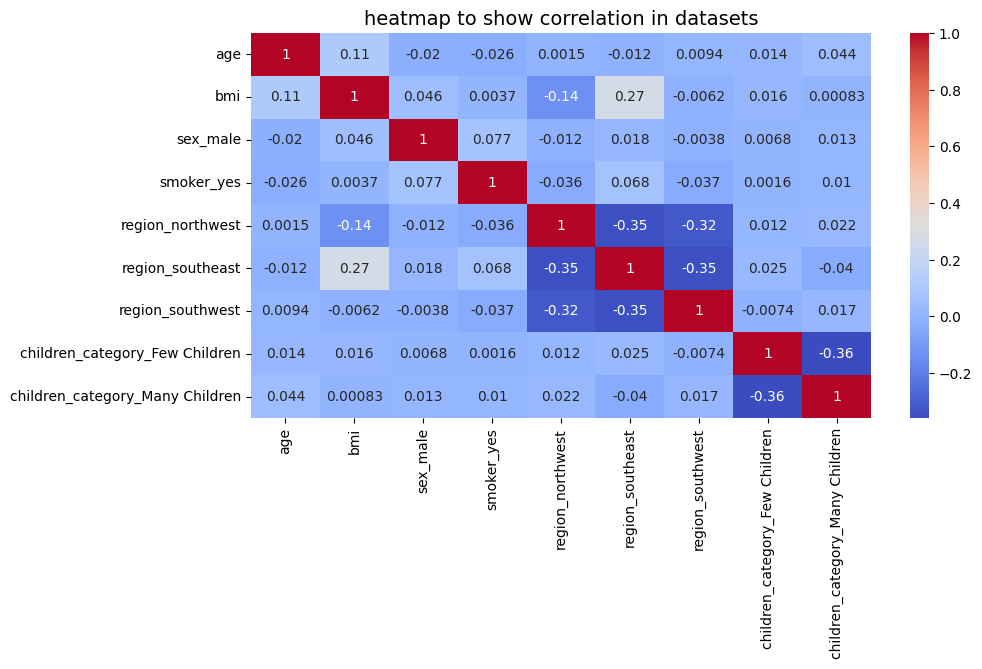

In [ ]:
plt.figure(figsize=(10, 5))  # Adjust the figure size based on the number of plots
sns.heatmap( X.corr(), annot = True, cmap = 'coolwarm')
plt.title("heatmap to show correlation in datasets",fontsize=14)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = X.astype(float) # This line added to convert to float
# Let's say X is your independent variables DataFrame
X_const = add_constant(X)  # Add intercept term

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns[1:]
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(1,X_const.shape[1])]
#print(vif_data)
pd.DataFrame(vif_data)

,Feature,VIF
0,age,1.018082
1,bmi,1.106704
2,sex_male,1.008936
3,smoker_yes,1.012228
4,region_northwest,1.518116
5,region_southeast,1.653814
6,region_southwest,1.528561
7,children_category_Few Children,1.150153
8,children_category_Many Children,1.153013


## No multicollinearity


# **Fitting the MLR model without any transformation**

In [ ]:
X=X.apply(lambda x: x.astype(float))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_p = sm.add_constant(X_train)
model = sm.OLS(y_train, X_p).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     316.7
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          4.42e-293
Time:                        15:09:01   Log-Likelihood:                -10833.
No. Observations:                1069   AIC:                         2.169e+04
Df Residuals:                    1059   BIC:                         2.173e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

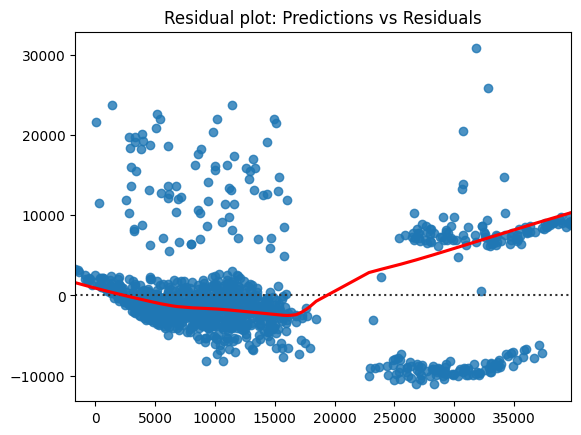

In [ ]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residual plot: Predictions vs Residuals')
plt.show()


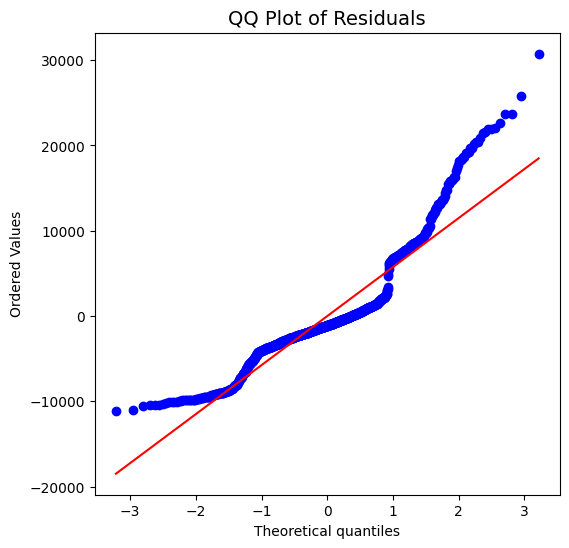

In [ ]:
# Create the QQ plot for residuals
plt.figure(figsize=(6, 6))
stats.probplot(model.resid, dist="norm", plot=plt)

# Add a title to the QQ plot
plt.title('QQ Plot of Residuals', fontsize=14)

# Show the plot
plt.show()

In [ ]:
std_res=model.resid/np.std(model.resid)

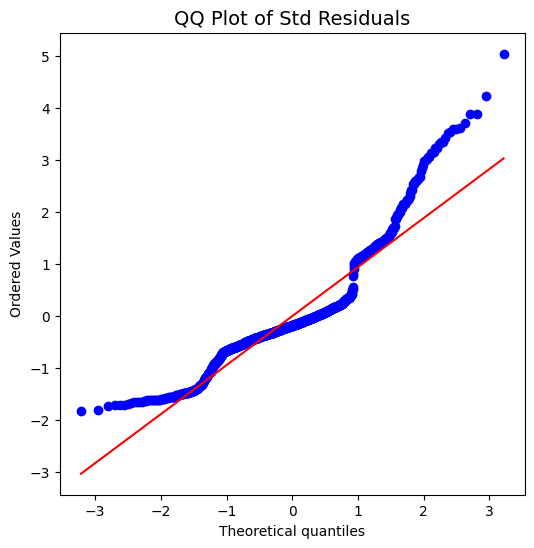

In [ ]:
# Create the QQ plot for std residuals
plt.figure(figsize=(6, 6))
stats.probplot(std_res, dist="norm", plot=plt)

# Add a title to the QQ plot
plt.title('QQ Plot of Std Residuals', fontsize=14)

# Show the plot
plt.show()

In [ ]:
from scipy.stats import shapiro
shapiro_test = shapiro(model.resid)
print("Shapiro-Wilk Test:", shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=np.float64(0.8856460044026103), pvalue=np.float64(2.2665833582173672e-27))


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan p-value:", bp_test[1])  # p-value for heteroscedasticity


Breusch-Pagan p-value: 5.558665207610466e-16


## **Prediction on test data**

In [ ]:
X_test1=sm.add_constant(X_test)

y_pred = model.predict(X_test1)
res=y_test-y_pred
# Evaluate the model performance on the testing set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
adj_r=1-(1-r_squared)*(X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)
# Print the evaluation metrics on the training set
print("Testing Set:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adj_R-squared:", adj_r)

Testing Set:
Mean Squared Error: 35397807.668397665
Root Mean Squared Error: 5949.6056733532905
R-squared: 0.8073652270845304
Adj_R-squared: 0.7998697106286755


# **Scaling and Transformations**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Identify numeric and categorical columns
numeric_cols = ['age', 'bmi']
categorical_cols = ['sex', 'smoker', 'region','children']

# Standardize numeric features only
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
Y=(y2-np.mean(y2))/np.std(y2)
X

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_category_Few Children,children_category_Many Children
0,-1.440418,-0.453160,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.511647,0.509422,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.799350,0.383155,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.443201,-1.305052,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.514431,-0.292456,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,0.767704,0.050269,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1334,-1.511647,0.206053,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,-1.511647,1.014490,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1336,-1.297958,-0.797524,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = X.astype(float) # This line added to convert to float
# Let's say X is your independent variables DataFrame
X_const = add_constant(X)  # Add intercept term

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns[1:]
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(1,X_const.shape[1])]
pd.DataFrame(vif_data)
X

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_category_Few Children,children_category_Many Children
0,-1.440418,-0.453160,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.511647,0.509422,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.799350,0.383155,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.443201,-1.305052,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.514431,-0.292456,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,0.767704,0.050269,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1334,-1.511647,0.206053,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,-1.511647,1.014490,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1336,-1.297958,-0.797524,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Fitting the MLR model with transformed response and scaled predictors**

## **Assessing the Hat Matrix**

In [ ]:
H = X.values @ (np.linalg.inv(X.values.T @ X.values)) @ X.values.T
pd.DataFrame(np.diag(H)).apply(lambda x : x>(2*10/1337)).value_counts()
points=np.where(pd.DataFrame(np.diag(H))>(2*10/1337))[0] # >2*(p+1)/n (flag condition)

In [ ]:
X.iloc[points,:]

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_category_Few Children,children_category_Many Children
860,-0.158282,2.777309,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1047,-1.226729,3.593945,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1317,-1.511647,3.684136,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Three points are found having unusual x coordinate( high leverage)

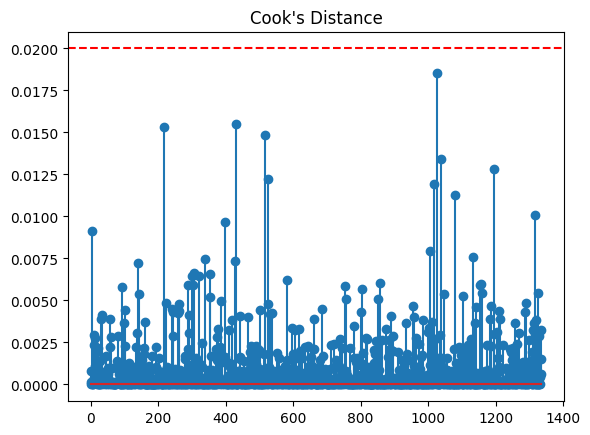

In [ ]:
import statsmodels.api as sm
model = sm.OLS(Y, X).fit()

influence = model.get_influence()
cooks_d, _ = influence.cooks_distance

# Plot or check high values
import matplotlib.pyplot as plt
plt.stem(cooks_d)
plt.axhline(0.02, color='red', linestyle='--')
plt.title("Cook's Distance")
plt.show()

### Since all the points are having Cook D < 0.02 << 1, hence no influential point present in the dataset.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_p = sm.add_constant(X_train)
model = sm.OLS(y_train, X_p).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     353.2
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          1.48e-311
Time:                        15:09:17   Log-Likelihood:                -761.19
No. Observations:                1069   AIC:                             1542.
Df Residuals:                    1059   BIC:                             1592.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

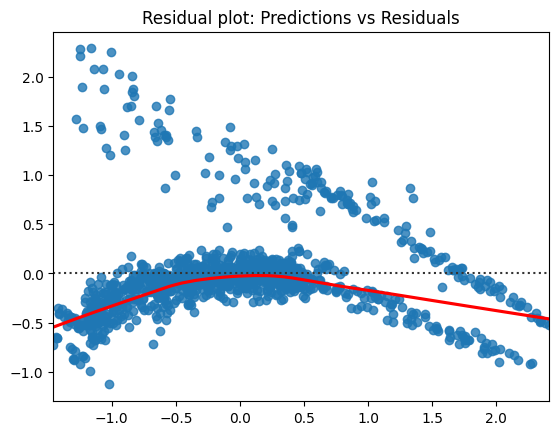

In [ ]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residual plot: Predictions vs Residuals')
plt.show()

## **Prediction on test data**

In [ ]:
X_test1=sm.add_constant(X_test)

y_pred = model.predict(X_test1)
res=y_test-y_pred
# Evaluate the model performance on the testing set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
adj_r=1-(1-r_squared)*(X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)
# Print the evaluation metrics on the training set
print("Testing Set:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adj_R-squared:", adj_r)

Testing Set:
Mean Squared Error: 0.18399311288023545
Root Mean Squared Error: 0.42894418387505323
R-squared: 0.8334864018205175
Adj_R-squared: 0.8270072734866855


# **10 fold cross validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Model with no intercept
model = LinearRegression(fit_intercept=True)

# Define predictors and response
x = X
y = Y

# KFold setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation and compute R^2 scores
r2_scores = cross_val_score(model, x, y, cv=kf, scoring='r2')
adj_r2_scores=1-(1-r2_scores)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
# Print results
print("R^2 scores for each fold:", r2_scores)
print("Average R^2:", r2_scores.mean())
print("Average Adjusted R^2:", adj_r2_scores.mean())

R^2 scores for each fold: [0.84776642 0.81489595 0.69651047 0.74459442 0.78322051 0.72316062
 0.7192197  0.75361519 0.76542915 0.77844902]
Average R^2: 0.7626861431415791
Average Adjusted R^2: 0.7610766294175957


# **Polynomial Regression (Final Model)**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X_p=X.iloc[:,[0,1,3]]
# Add quadratic or interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_p)
X_poly_df = pd.DataFrame(X_poly).reset_index(drop=True)
X_rest = X.iloc[:, [2,4,5,6,7,8]].reset_index(drop=True)
X_p1=pd.concat([X_poly_df,X_rest],axis=1)
# Define new names for the first 9 columns
new_names = ['A', 'B', 'S','A^2', 'AB', 'AS','B^2','BS','S^2']

#Assign the new names to the first 5 columns
X_p1.columns = new_names + list(X_p1.columns[9:])
X_p=X_p1.drop(['S^2'],axis=1)
X_p

,A,B,S,A^2,AB,AS,B^2,BS,sex_male,region_northwest,region_southeast,region_southwest,children_category_Few Children,children_category_Many Children
0,-1.440418,-0.453160,1.0,2.074803,0.652739,-1.440418,0.205354,-0.453160,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.511647,0.509422,0.0,2.285078,-0.770066,-0.000000,0.259510,0.000000,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.799350,0.383155,0.0,0.638961,-0.306275,-0.000000,0.146807,0.000000,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.443201,-1.305052,0.0,0.196427,0.578401,-0.000000,1.703161,-0.000000,1.0,1.0,0.0,0.0,0.0,0.0
4,-0.514431,-0.292456,0.0,0.264639,0.150449,-0.000000,0.085531,-0.000000,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.767704,0.050269,0.0,0.589370,0.038592,0.000000,0.002527,0.000000,1.0,1.0,0.0,0.0,0.0,1.0
1333,-1.511647,0.206053,0.0,2.285078,-0.311479,-0.000000,0.042458,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1334,-1.511647,1.014490,0.0,2.285078,-1.533551,-0.000000,1.029190,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
1335,-1.297958,-0.797524,0.0,1.684696,1.035153,-0.000000,0.636045,-0.000000,0.0,0.0,0.0,1.0,0.0,0.0


## **Assessing the Hat Matrix**

In [ ]:
H = X_p.values @ (np.linalg.inv(X_p.values.T @ X_p.values)) @ X_p.values.T
pd.DataFrame(np.diag(H)).apply(lambda x : x>(2*15/1337)).value_counts()
points_=np.where(pd.DataFrame(np.diag(H))>(2*15/1337))[0] # >2*(p+1)/n (flag condition)

In [ ]:
X_p.iloc[points_,:]

,A,B,S,A^2,AB,AS,B^2,BS,sex_male,region_northwest,region_southeast,region_southwest,children_category_Few Children,children_category_Many Children
11,1.622461,-0.717173,1.0,2.632380,-1.163585,1.622461,0.514336,-0.717173,0.0,0.0,1.0,0.0,0.0,0.0
14,-0.870580,1.880321,1.0,0.757909,-1.636969,-0.870580,3.535607,1.880321,1.0,0.0,1.0,0.0,0.0,0.0
39,1.480002,1.514639,1.0,2.190405,2.241667,1.480002,2.294130,1.514639,1.0,0.0,0.0,1.0,0.0,0.0
64,-1.369188,-1.351787,1.0,1.874676,1.850851,-1.369188,1.827329,-1.351787,0.0,1.0,0.0,0.0,0.0,0.0
94,1.764921,0.104383,1.0,3.114945,0.184228,1.764921,0.010896,0.104383,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.764921,-1.132050,1.0,3.114945,-1.997978,1.764921,1.281537,-1.132050,1.0,0.0,1.0,0.0,0.0,0.0
1281,-1.511647,-1.476415,1.0,2.285078,2.231818,-1.511647,2.179800,-1.476415,0.0,0.0,0.0,0.0,0.0,0.0
1287,-1.369188,1.432647,1.0,1.874676,-1.961563,-1.369188,2.052477,1.432647,1.0,0.0,0.0,1.0,1.0,0.0
1316,-1.511647,3.684136,0.0,2.285078,-5.569115,-0.000000,13.572857,0.000000,1.0,0.0,1.0,0.0,0.0,0.0


### 71 points are having unusual X axis(leverage points).

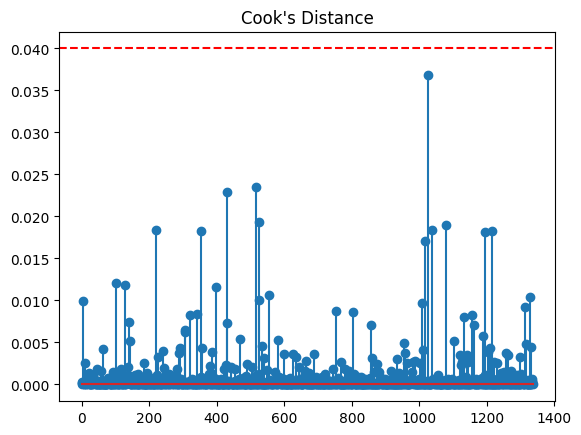

In [ ]:
import statsmodels.api as sm
model = sm.OLS(Y, X_p).fit()

influence = model.get_influence()
cooks_d, _ = influence.cooks_distance

# Plot or check high values
import matplotlib.pyplot as plt
plt.stem(cooks_d)
plt.axhline(0.04, color='red', linestyle='--')
plt.title("Cook's Distance")
plt.show()

### Since all the points are having Cook D < 0.04 << 1, hence no influential point present in the dataset.

## **Fitting polynomial regression**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_p, Y, test_size=0.2, random_state=42)
X_p1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_p1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     325.4
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:09:30   Log-Likelihood:                -608.74
No. Observations:                1069   AIC:                             1247.
Df Residuals:                    1054   BIC:                             1322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
model.params # regression coefficients

,0
const,-0.296795
A,0.615918
B,0.010635
S,1.685944
A^2,-0.030903
AB,0.003653
AS,-0.501121
B^2,-0.032455
BS,0.370752
sex_male,-0.087451


In [ ]:
fitted_vals = model.fittedvalues
studentized_residuals = model.get_influence().resid_studentized_external


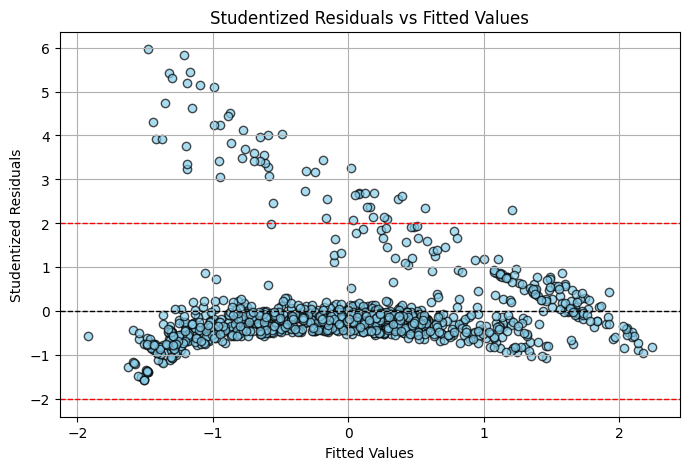

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(fitted_vals, studentized_residuals, edgecolor='k', facecolor='skyblue', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=2, color='red', linestyle='--', linewidth=1)
plt.axhline(y=-2, color='red', linestyle='--', linewidth=1)

plt.title('Studentized Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.grid(True)
plt.show()


## **Prediction on test Data**

In [ ]:
X_test1=sm.add_constant(X_test)

y_pred = model.predict(X_test1)
res=y_test-y_pred
# Evaluate the model performance on the testing set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
adj_r=1-(1-r_squared)*(X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)
# Print the evaluation metrics on the training set
print("Testing Set:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adj_R-squared:", adj_r)

Testing Set:
Mean Squared Error: 0.13644084060337078
Root Mean Squared Error: 0.3693789931809479
R-squared: 0.8765211645596273
Adj_R-squared: 0.8691712338786527


## **Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Model with no intercept
lm = LinearRegression(fit_intercept=True)

# Define predictors and response
x = X_p
y = Y

# KFold setup
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Perform 10-fold cross-validation and compute R^2 scores
r2_scores = cross_val_score(lm, x, y, cv=kf, scoring='r2')
adj_r2_scores=1-(1-r2_scores)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
# Print results
print("R^2 scores for each fold:", r2_scores)
print("Average R^2:", r2_scores.mean())
print("Average Adjusted R^2:", adj_r2_scores.mean())

R^2 scores for each fold: [0.92956819 0.88455546 0.84688018 0.83982085 0.84273994 0.61164033
 0.71808036 0.93083585 0.84930256 0.86408629 0.78085111 0.73991856
 0.77704718 0.8299653  0.84094719 0.81452668 0.86437806 0.78276364
 0.76309466 0.89532233]
Average R^2: 0.8203162363708021
Average Adjusted R^2: 0.8190975823597524


### After cross validation 81% adj R^2 is quite good.

# **Best Model Selection**

## **Using AIC,BIC and Mallows Cp**

In [ ]:
import itertools
import statsmodels.api as sm

def calculate_cp(model, full_rss, sigma2, n):
    rss = sum(model.resid ** 2)
    p = model.df_model + 1  # +1 for intercept
    cp = rss / sigma2 - (n - 2 * p)
    return cp

X = X_p  # Adjust column name
y = Y
X = sm.add_constant(X)

n = len(y)
full_model = sm.OLS(y, X).fit()
full_rss = sum(full_model.resid ** 2)
sigma2 = full_rss / (n - X.shape[1])

results = []

for k in range(1, len(X.columns) + 1):
    for combo in itertools.combinations(X.columns, k):
        X_subset = X[list(combo)]
        model = sm.OLS(y, X_subset).fit()
        cp = calculate_cp(model, full_rss, sigma2, n)
        results.append({
            'features': combo,
            'aic': model.aic,
            'bic': model.bic,
            'cp': cp,
            'r_squared': model.rsquared
        })

results_df = pd.DataFrame(results)


In [ ]:
n=[]
for i in ["aic","bic","cp"]:
    n.append((i,results_df.sort_values(by=i).head()['features'].iloc[0]))

In [ ]:
d=dict(n)

In [ ]:
d['bic']

('const',
 'A',
 'S',
 'AS',
 'B^2',
 'BS',
 'sex_male',
 'region_southeast',
 'region_southwest',
 'children_category_Few Children',
 'children_category_Many Children')

In [ ]:
dff=pd.DataFrame(d['aic'])

In [ ]:
dff=pd.concat([pd.DataFrame(d['bic']),pd.DataFrame(d['cp']),dff],axis=1)
dff.columns=['BIC','Cp','AIC']

## **Best models obtained from different model selection criteria:**

In [ ]:
dff

,BIC,Cp,AIC
0,const,const,const
1,A,A,A
2,S,S,S
3,AS,A^2,A^2
4,B^2,AS,AS
5,BS,B^2,B^2
6,sex_male,BS,BS
7,region_southeast,sex_male,sex_male
8,region_southwest,region_northwest,region_northwest
9,children_category_Few Children,region_southeast,region_southeast


### BIC reduces the model of 14 predictors to 10 predictors only.

## **Fitting with Best model obtained by BIC**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_p.loc[:,d['bic'][1:]], Y, test_size=0.2, random_state=42)
X_p1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_p1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:11:04   Log-Likelihood:                -611.54
No. Observations:                1069   AIC:                             1245.
Df Residuals:                    1058   BIC:                             1300.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## **Prediction by best model on test data**

In [ ]:
X_test1=sm.add_constant(X_test)

y_pred = model.predict(X_test1)
res=y_test-y_pred
# Evaluate the model performance on the testing set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
adj_r=1-(1-r_squared)*(X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)
# Print the evaluation metrics on the training set
print("Testing Set:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adj_R-squared:", adj_r)

Testing Set:
Mean Squared Error: 0.1402365545845199
Root Mean Squared Error: 0.37448171461971264
R-squared: 0.8730860468926268
Adj_R-squared: 0.8676327129700444


In [ ]:
model.params # regression coefficients

,0
const,-0.365515
A,0.615467
S,1.685866
AS,-0.503480
B^2,-0.031051
BS,0.375838
sex_male,-0.087265
region_southeast,-0.084615
region_southwest,-0.112649
children_category_Few Children,0.221029


## **Best Model Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Model with no intercept
lm = LinearRegression(fit_intercept=True)

# Define predictors and response
x = X_p.loc[:,d['bic'][1:]]
y = Y

# KFold setup
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Perform 10-fold cross-validation and compute R^2 scores
r2_scores = cross_val_score(lm, x, y, cv=kf, scoring='r2')
adj_r2_scores=1-(1-r2_scores)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
# Print results
print("R^2 scores for each fold:", r2_scores)
print("Average R^2:", r2_scores.mean())
print("Average Adjusted R^2:", adj_r2_scores.mean())

R^2 scores for each fold: [0.92877084 0.87840295 0.84234614 0.83706403 0.83990351 0.61401578
 0.72051593 0.92866639 0.84028672 0.86746981 0.78002361 0.74090971
 0.7781069  0.83620388 0.83296503 0.81339894 0.86623489 0.79055031
 0.76654704 0.89410531]
Average R^2: 0.8198243865576101
Average Adjusted R^2: 0.8177784863292711


### After cross validation, 81% of adj R^2 is obtained by the best model with only 10 predictors instead of 14 predictors.This is great model complexity reduction.

# **Best Model Diagnostics**

## **Linearity**

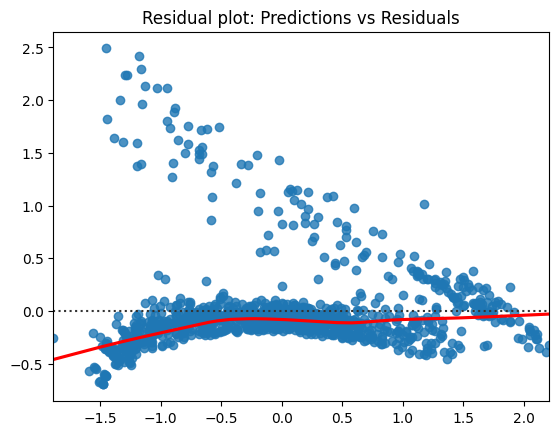

In [ ]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residual plot: Predictions vs Residuals')
plt.show()

### Linearity is approximately satisfied

## **Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_p = X_p.astype(float) # This line added to convert to float
# Let's say X is your independent variables DataFrame
X_const = add_constant(X_p.loc[:,d['bic'][1:]])  # Add intercept term

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns[1:]
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(1,X_const.shape[1])]
pd.DataFrame(vif_data)

,Feature,VIF
0,A,1.256972
1,S,1.013398
2,AS,1.262840
3,B^2,1.033046
4,BS,1.038399
5,sex_male,1.011113
6,region_southeast,1.180846
7,region_southwest,1.142706
8,children_category_Few Children,1.150800
9,children_category_Many Children,1.152839


### All VIFs<5 hence Multicollinearity  is not suspected.

## **Independence of Errors**

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# After fitting your model (e.g., `model = sm.OLS(y, X).fit()`)
dw_stat = durbin_watson(model.resid)

print(f"Durbin-Watson Statistic: {dw_stat:.4f}")

Durbin-Watson Statistic: 1.9374


### Durbin-Watson Statistic: 1.9374 (close to 2) indicates that residuals are not significantly autocorrelated hence Independence of errors is satisfied.

## **Homoscedasticity**

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan p-value:", bp_test[1])  # p-value for heteroscedasticity


Breusch-Pagan p-value: 1.5289038546450486e-09


### Breusch-Pagan p-value: 1.5289038546450486e-09 << 0.05 hence H0 is rejected and hence not Homoscedastic.

## **Normality of Errors**

In [ ]:
from scipy.stats import shapiro
shapiro_test = shapiro(model.resid)
print("Shapiro-Wilk Test:", shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=np.float64(0.6578909529102351), pvalue=np.float64(8.278957744866224e-42))


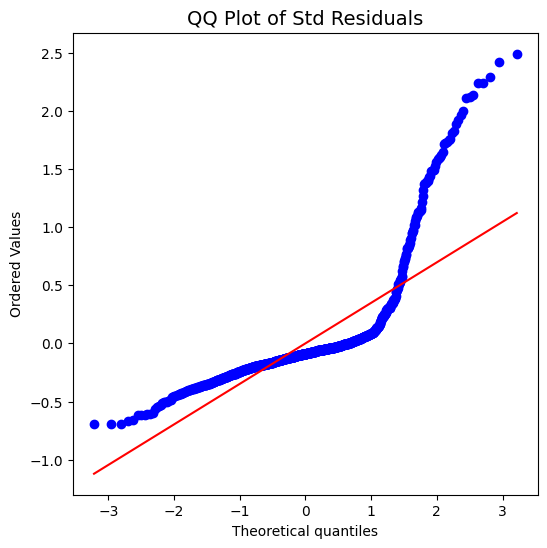

In [ ]:
# Create the QQ plot for std residuals
plt.figure(figsize=(6, 6))
stats.probplot(model.resid, dist="norm", plot=plt)

# Add a title to the QQ plot
plt.title('QQ Plot of Std Residuals', fontsize=14)

# Show the plot
plt.show()

### QQ plot and Shapiro wilk test indicates that Residuals are very far from normality, hence normality assumption is violated.

# **Conclusion**

## As the assumptions of Normality of errors,Homoscedasticity are violated so we must shift to some advanced non parametric methods which doesn't require normality and constant variance assumption for reliable predictions.

# **Decision tree**

In [ ]:
# Features and Target
X = data.drop("charges", axis=1)
y = data["charges"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit on training data
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = tree_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2861.526055444029
R² Score: 0.79295345511094


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model (you can tune hyperparameters like n_estimators later)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_rf_pred = rf_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

print("Random Forest MAE:", mean_absolute_error(y_test, y_rf_pred))
print("Random Forest R² Score:", r2_score(y_test, y_rf_pred))


Random Forest MAE: 2549.440291550374
Random Forest R² Score: 0.883044995439703


# **XGBoost**

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_xgb_pred = xgb_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

print("XGBoost MAE:", mean_absolute_error(y_test, y_xgb_pred))
print("XGBoost R² Score:", r2_score(y_test, y_xgb_pred))


XGBoost MAE: 2487.3328951847307
XGBoost R² Score: 0.8990939094813829
